# Working with weekly data

`python 
nfl.import_weekly_data(years, columns, downcast)
`

Returns weekly data for the years and columns specified

years : required, list of years to pull data for (earliest available is 1999)

columns : optional, list of columns to pull data for

downcast : converts float64 columns to float32, reducing memory usage by ~30%. Will slow down initial load speed ~50%

In [2]:
import nfl_data_py as nfl

In [6]:
years = [2020, 2021, 2022, 2023, 2024]

In [7]:
nfl_df = nfl.import_weekly_data(years, downcast=True)

Downcasting floats.


In [44]:
#nfl_df.to_csv("nfl_weekly_data.csv", index=False)
nfl_df.head()

,player_id,player_name,player_display_name,position,position_group,headshot_url,recent_team,season,week,season_type,...,receiving_first_downs,receiving_epa,receiving_2pt_conversions,racr,target_share,air_yards_share,wopr,special_teams_tds,fantasy_points,fantasy_points_ppr
0,00-0019596,T.Brady,Tom Brady,QB,QB,https://static.www.nfl.com/image/private/f_aut...,TB,2020,1,REG,...,0.0,NaN,0,NaN,NaN,NaN,NaN,0.0,20.459999,20.459999
1,00-0019596,T.Brady,Tom Brady,QB,QB,https://static.www.nfl.com/image/private/f_aut...,TB,2020,2,REG,...,0.0,NaN,0,NaN,NaN,NaN,NaN,0.0,8.680000,8.680000
2,00-0019596,T.Brady,Tom Brady,QB,QB,https://static.www.nfl.com/image/private/f_aut...,TB,2020,3,REG,...,0.0,NaN,0,NaN,NaN,NaN,NaN,0.0,23.879999,23.879999
3,00-0019596,T.Brady,Tom Brady,QB,QB,https://static.www.nfl.com/image/private/f_aut...,TB,2020,4,REG,...,0.0,NaN,0,NaN,NaN,NaN,NaN,0.0,32.459999,32.459999
4,00-0019596,T.Brady,Tom Brady,QB,QB,https://static.www.nfl.com/image/private/f_aut...,TB,2020,5,REG,...,0.0,NaN,0,NaN,NaN,NaN,NaN,0.0,14.120000,14.120000


In [9]:
columns = nfl_df.columns
for col in columns:
    print(col)

player_id
player_name
player_display_name
position
position_group
headshot_url
recent_team
season
week
season_type
opponent_team
completions
attempts
passing_yards
passing_tds
interceptions
sacks
sack_yards
sack_fumbles
sack_fumbles_lost
passing_air_yards
passing_yards_after_catch
passing_first_downs
passing_epa
passing_2pt_conversions
pacr
dakota
carries
rushing_yards
rushing_tds
rushing_fumbles
rushing_fumbles_lost
rushing_first_downs
rushing_epa
rushing_2pt_conversions
receptions
targets
receiving_yards
receiving_tds
receiving_fumbles
receiving_fumbles_lost
receiving_air_yards
receiving_yards_after_catch
receiving_first_downs
receiving_epa
receiving_2pt_conversions
racr
target_share
air_yards_share
wopr
special_teams_tds
fantasy_points
fantasy_points_ppr


In [108]:
QB_stats = [
    "player_display_name",
    "season",
    "season_type",
    "week",
    "recent_team",
    "completions",
    "attempts",
    "passing_yards",
    "passing_tds",
    "interceptions",
    "sacks",
    "sack_yards",
    "sack_fumbles",
    "sack_fumbles_lost"
    ]

qb_df_2020 = nfl_df[(nfl_df["position"] == "QB") & (nfl_df["season"] == 2020)][QB_stats]

In [109]:
qb_df_2020

,player_display_name,season,season_type,week,recent_team,completions,attempts,passing_yards,passing_tds,interceptions,sacks,sack_yards,sack_fumbles,sack_fumbles_lost
0,Tom Brady,2020,REG,1,TB,23,36,239.0,2,2.0,3.0,15.0,1,0
1,Tom Brady,2020,REG,2,TB,23,35,217.0,1,1.0,0.0,-0.0,0,0
2,Tom Brady,2020,REG,3,TB,25,38,297.0,3,0.0,2.0,12.0,0,0
3,Tom Brady,2020,REG,4,TB,30,46,369.0,5,1.0,0.0,-0.0,0,0
4,Tom Brady,2020,REG,5,TB,25,41,253.0,1,0.0,3.0,20.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5433,Joe Burrow,2020,REG,6,CIN,25,39,313.0,0,1.0,2.0,13.0,0,0
5434,Joe Burrow,2020,REG,7,CIN,35,47,406.0,3,1.0,4.0,35.0,2,1
5435,Joe Burrow,2020,REG,8,CIN,26,37,249.0,2,0.0,0.0,-0.0,0,0
5436,Joe Burrow,2020,REG,10,CIN,21,40,213.0,1,0.0,4.0,28.0,0,0


In [112]:
x = qb_df_2020[(qb_df_2020["player_display_name"] == "Tom Brady") & (qb_df_2020["season_type"] == "REG")]["week"]
y = qb_df_2020[(qb_df_2020["player_display_name"] == "Tom Brady")& (qb_df_2020["season_type"] == "REG")]["passing_yards"]

x

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    14
13    15
14    16
15    17
Name: week, dtype: int32

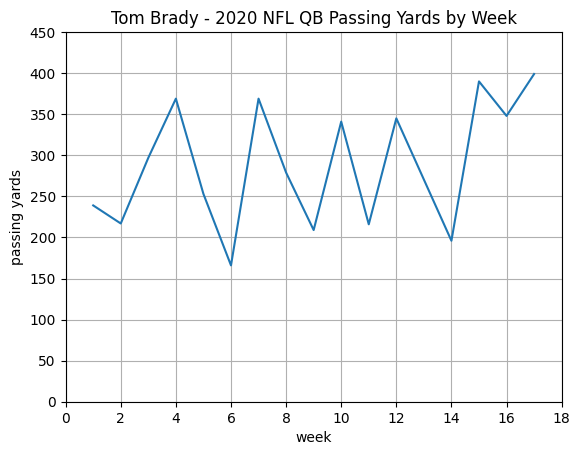

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


fig, ax = plt.subplots()
ax.plot(x, y)

ax.set(xlabel='week', ylabel='passing yards',
       title='Tom Brady - 2020 NFL QB Passing Yards by Week',
       xlim=(0, 18), ylim=(0, 450),
       xticks=np.arange(0, 19, 2),
       )

ax.grid()

#fig.savefig("test.png")
plt.show()

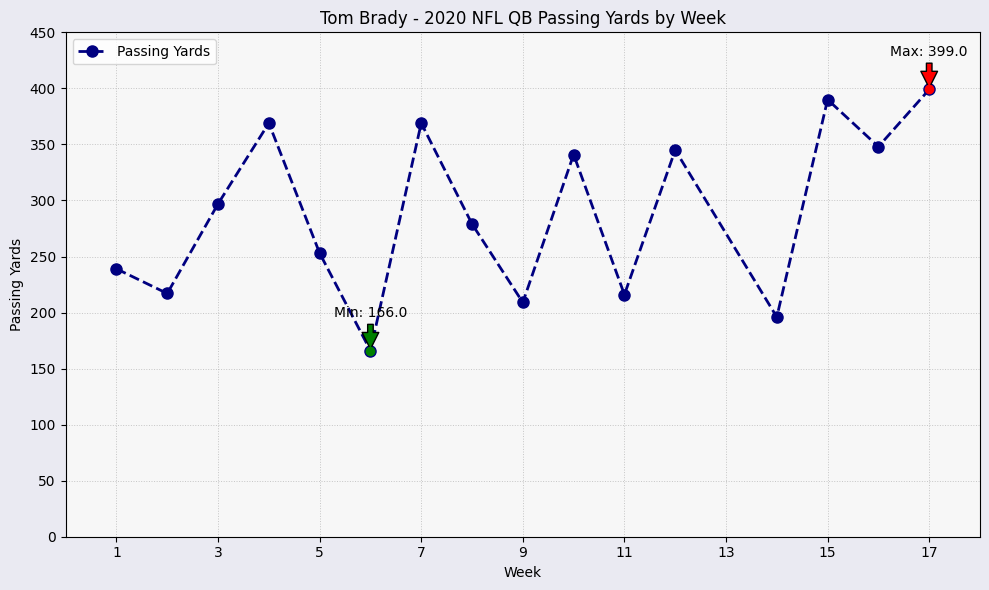

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(10, 6))

# Customize the line plot style
ax.plot(x, y, color='navy', linestyle='--', marker='o', linewidth=2, markersize=8, label='Passing Yards')

ax.set(
    xlabel='Week',
    ylabel='Passing Yards',
    title='Tom Brady - 2020 NFL QB Passing Yards by Week',
    xlim=(0, 18),
    ylim=(0, 450)
)

# Customize ticks and grid
ax.set_xticks(np.arange(1, 19, 2))
ax.set_yticks(np.arange(0, 451, 50))

#Customize grid
ax.grid(True, which='both', linestyle=':', linewidth=0.7, alpha=0.7)

# Add a Legend
ax.legend(loc='upper left', fontsize=10)

# Add a background color
ax.set_facecolor('#f7f7f7')
fig.patch.set_facecolor('#eaeaf2')

# Highlight max week
max_week = x[y.idxmax()]
max_yards = y.max()
ax.scatter(max_week, max_yards, color='red', zorder=5)
ax.annotate(f'Max: {max_yards}', xy=(max_week, max_yards), xytext=(max_week, max_yards+30),
            arrowprops=dict(facecolor='red', shrink=0.05), ha='center')


# Highlight lowest week
min_week = x[y.idxmin()]
min_yards = y.min()
ax.scatter(min_week, min_yards, color='green', zorder=5)
ax.annotate(f'Min: {min_yards}', xy=(min_week, min_yards), xytext=(min_week, min_yards+30),
            arrowprops=dict(facecolor='green', shrink=0.05), ha='center')

plt.tight_layout()
plt.show()
